In [1]:
#Calculate structure tensor
import cv2 as cv
import numpy as np
import argparse
W = 52          # window size is WxW
C_Thr = 0.43    # threshold for coherency
LowThr = 35     # threshold1 for orientation, it ranges from 0 to 180
HighThr = 57    # threshold2 for orientation, it ranges from 0 to 180
def calcGST(inputIMG, w):
    img = inputIMG.astype(np.float32)
    # GST components calculation (start)
    # J =  (J11 J12; J12 J22) - GST
    imgDiffX = cv.Sobel(img, cv.CV_32F, 1, 0, 3)
    imgDiffY = cv.Sobel(img, cv.CV_32F, 0, 1, 3)
    imgDiffXY = cv.multiply(imgDiffX, imgDiffY)
    
    imgDiffXX = cv.multiply(imgDiffX, imgDiffX)
    imgDiffYY = cv.multiply(imgDiffY, imgDiffY)
    J11 = cv.boxFilter(imgDiffXX, cv.CV_32F, (w,w))
    J22 = cv.boxFilter(imgDiffYY, cv.CV_32F, (w,w))
    J12 = cv.boxFilter(imgDiffXY, cv.CV_32F, (w,w))
    return J11, J22, J12

ModuleNotFoundError: No module named 'cv2'

In [8]:
import numpy as np
import scipy.fftpack as spf
from numpy.fft import fft2, fftshift, ifft2

In [4]:
class ExposureFilter:
    def __init__(self,img, acceleration_voltage, critical_dose_scaling, critical_dose_power, critical_dose_a, critical_dose_b,critical_dose_c, voltage_scaling_factor):
        self.img = img
        self.acceleration_volatage = acceleration_voltage
        self.critical_dose_scaling = critical_dose_scaling
        self.critical_dose_power = critical_dose_power
        self.critical_dose_a = critical_dose_a
        self.critical_dose_b = critical_dose_b
        self.critical_dose_c = critical_dose_c
        self.voltage_scaling_factor = voltage_scaling_factor
    def DoseFilter(self,dose_at_end_of_frame, critical_dose):
        #compute dose filter, which is the signal attenuation factor due to radiation damage
        dose_filter = np.exp((-0.5*dose_at_end_of_frame)/critical_dose)
        return dose_filter
    def CriticalDose(self, spatial_frequency):
        #given a spatial frequency, return the critical dose in electrons per square angstroms
        critical_dose = (self.critical_dose_a*(spatial_frequency**self.critical_dose_b)+self.critical_dose_c)*self.voltage_scaling_factor
        return critical_dose
    def SignalToNoiseFromDoseGivenCriticalDose(self, dose, critical_dose):
        #given a number of electrons and a critical dose, return the snr
        if dose == 0.0:
            snr = 0.0
        else:
            snr = (1-np.exp(-dose*0.5/critical_dose))**2/dose
        return snr
    def OptimalDoseGiven(self,critical_dose):
        #given the critical dose, return an estimate of the optimal dose
        optimal_dose = 2.51284 * critical_dose
        return optimal_dose
    def GetDoseFilter(self, dose_start, dose_finish):
        #apply dose filter to the image
        num_of_img = self.img.allimg().shape[0]
        dose_per_frame = (dose_finish-dose_finish)/num_of_img
        current_critical_dose = 0
        critical_dose_at_dc = 10e35
        all_filters = np.zeros([num_of_img, self.img.allimg().shape[1],self.img.allimg().shape[2]])
        all_fft = np.zeros([num_of_img, self.img.allimg().shape[1],self.img.allimg().shape[2]])
        for i in range(num_of_img):
            print(i)
            dose_finish += dose_per_frame
            #do FFT of the image
            single_frame = self.img.allimg()[i]
            F = fft2(single_frame)
            F = fftshift(F)
            xfreq = np.fft.fftfreq(single_frame.shape[0],d = self.img.pixel_distance())
            xfreq = fftshift(xfreq)
            yfreq = np.fft.fftfreq(single_frame.shape[1],d = self.img.pixel_distance())
            yfreq = fftshift(yfreq)
            for j in range(len(xfreq)):
                for k in range(len(yfreq)):
                    if xfreq[j] == 0.0 and yfreq[k] == 0.0:
                        current_critical_dose = critical_dose_at_dc
                    else:
                        current_critical_dose = self.CriticalDose(np.sqrt(xfreq[j]**2+yfreq[k]**2))
                    current_optimal_dose = self.OptimalDoseGiven(current_critical_dose)
                    #print(current_critical_dose)
                    if (abs(dose_finish-current_optimal_dose) < abs(dose_start-current_optimal_dose)):
                        dose_filter = self.DoseFilter(dose_finish, current_critical_dose)
                        #print(dose_filter)
                        all_filters[i,j,k] = dose_filter
                        new_val = dose_filter * F[j,k]
                        all_fft[i,j,k] = new_val
                    else:
                        all_filters[i,j,k] = 0
                        all_fft[i,j,k] = F[j,k]
            dose_start += dose_per_frame
        return all_filters, all_fft
        
    
    
            
    

In [5]:
class MovieImage:
    def __init__(self, mrcfile, pixel_spacing, acceleration_voltage):
        self.mrcfile = mrcfile
        self.pixel_spacing = pixel_spacing
        self.acceleration_voltage = acceleration_voltage
    def allimg(self):
        with mrcfile.open(self.mrcfile) as f:
            movie = f.data
        return movie
    def pixel_distance(self):
        return self.pixel_spacing

In [9]:
exp1 = ExposureFilter(mov, 300, 0.7070384, -1.22776, 0.24499, -1.6649, 2.8141,1.0)
t1,t2 = exp1.GetDoseFilter(0, 100)

0


/home/home2/whuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
/home/home2/whuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: ComplexWarning: Casting complex values to real discards the imaginary part


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


KeyboardInterrupt: 

In [71]:
dose_filter

NameError: name 'dose_filter' is not defined

In [2]:
import numpy.f2py

In [7]:
with open('/Users/qinwenhuang/Documents/research/SR/core/images_core.f90') as fh:
    source = fh.read()

In [9]:
numpy.f2py.compile(source,modulename = 'test',extra_args='/Users/qinwenhuang/Documents/research/SR/core/*.f90')

1

In [1]:
import mrcfile
%matplotlib inline
import matplotlib.pyplot as plt


In [6]:
mrcd = 'May08_05.59.52.bin.mrc'
mov = MovieImage(mrcd, 1.5, 300)

In [55]:
tt = mov.allimg()[1]

In [56]:
tt.shape

(1200, 1240)

In [2]:
with mrcfile.open('May08_05.59.52.bin_14_0.mrc') as f:
    dat = f.data

FileNotFoundError: [Errno 2] No such file or directory: 'May08_05.59.52.bin_14_0.mrc'

In [6]:
dat.shape

(1, 1200, 1240)

In [7]:
dat = dat[0,:,:]

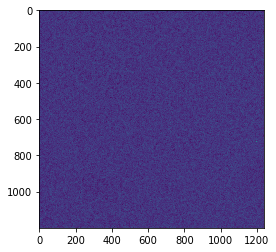

In [69]:
plt.imshow(dat)

In [20]:
import numpy as np

In [14]:
freqs = np.fft.fftfreq(dat.shape[0],d = 1.5)

In [9]:
xfreq = fftshift(freqs)

In [17]:
freqs[1]==0

False

In [47]:
yfreqs = np.fft.fftfreq(dat.shape[1],d = 1.5)

In [48]:
yfreq = fftshift(yfreqs)

In [23]:
max(freqs)

0.3327777777777778

In [38]:
import scipy.fftpack as spf
from numpy.fft import fft2, fftshift, ifft2

In [62]:
a = spf.fft2(dat)

In [63]:
a

array([[-2.7678758e-03     +0.j    , -1.2184911e+04+721180.2j   ,
        -2.5425944e+05+164985.34j  , ..., -4.8087591e+05 +89279.836j ,
        -2.5425944e+05-164985.34j  , -1.2184911e+04-721180.2j   ],
       [-4.6024756e+05 -48964.773j , -6.0623256e+05-142228.19j  ,
        -1.8631289e+04-154707.17j  , ..., -1.5707112e+05 -91663.57j  ,
         4.6406324e+04+207613.03j  ,  2.0165423e+05-104741.8j   ],
       [ 1.5577659e+05  +6495.4824j,  1.1085402e+04 -55296.156j ,
        -3.8570453e+04  +4699.5684j, ...,  1.1575867e+05 -44348.344j ,
         1.1872808e+05+100802.56j  ,  2.3831461e+05 +32723.309j ],
       ...,
       [ 1.4779930e+05-330438.53j  ,  1.4935144e+05-265923.12j  ,
         1.0983703e+05-107579.23j  , ..., -1.6449827e+05-209770.94j  ,
        -2.4280294e+05-142884.89j  , -4.7437141e+04-147277.11j  ],
       [ 1.5577659e+05  -6495.4824j,  2.3831461e+05 -32723.309j ,
         1.1872808e+05-100802.56j  , ...,  1.4904033e+05  -4285.903j ,
        -3.8570453e+04  -4699.5684j

In [29]:
b = abs(a)

In [37]:
a.shape

(1200, 1240)

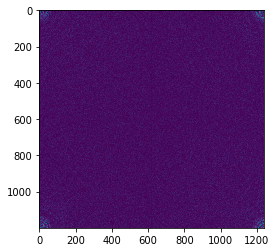

In [34]:
plt.imshow(b)

In [68]:
plt.imsave('test.png',P)

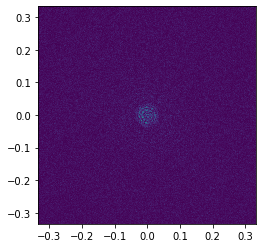

In [64]:
F = fft2(dat)/(dat.shape[0]*dat.shape[1])                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P,extent = [xfreq[0],xfreq[-1],yfreq[0],yfreq[-1]])

In [67]:
yfreq[-1]

0.3327956989247312

In [54]:
xfreq[0:len(xfreq)/2]

TypeError: slice indices must be integers or None or have an __index__ method

In [57]:
len(xfreq)//2

600

In [61]:
F

array([[ 0.00527252-8.20365003e-11j, -0.00746138+2.29588584e-02j,
         0.00091321+1.32738483e-02j, ...,  0.00885331+1.23563718e-02j,
         0.00091321-1.32738483e-02j, -0.00746138-2.29588584e-02j],
       [ 0.00999989-1.22464718e-02j,  0.03223923-1.13291672e-02j,
        -0.00633377+5.73976841e-03j, ...,  0.00875337-1.04066359e-02j,
         0.01677255+4.57320183e-03j,  0.01938304+4.76338048e-03j],
       [-0.00739203-1.47466477e-02j,  0.0020113 -1.51921702e-02j,
         0.01738991+7.98969162e-03j, ..., -0.0062817 -1.43004728e-02j,
        -0.00402326-6.75928653e-03j,  0.00359774+1.89017623e-02j],
       ...,
       [-0.00042863+1.14590815e-02j, -0.00441144-8.31429102e-04j,
         0.00984532+1.83771605e-02j, ..., -0.00101059+1.42706994e-02j,
         0.01288411+6.89876040e-03j, -0.0245747 +2.68627720e-02j],
       [-0.00739203+1.47466450e-02j,  0.00359774-1.89017623e-02j,
        -0.00402326+6.75928653e-03j, ..., -0.02223143-4.40115389e-03j,
         0.01738991-7.98969162e-03j

In [10]:
a = np.zeros([5,5,5]) + 10

TypeError: only integer scalar arrays can be converted to a scalar index